Week of Jul 11 - 15:

1. Check the central galaxies and their satellites: 

- by compare M_V of central to all of its satellites. 

- If any of its satellite is brighter than it => check the central galaxy again; 

2. Calculate total GCs: adding #GCs in galaxies which are not considered before since they did not match to any in Atlas;

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits

path ='/home/ngoc/Downloads/GCs/'
path1 ='/home/ngoc/Downloads/GCs/code/'

In [135]:
from astropy.coordinates import Angle
from astropy import units as u
from astropy.coordinates import SkyCoord

In [136]:
#load the coordinates, halo mass and #GC after match
M_h  = np.loadtxt(path+"code/data_Atlas_Harris13_by_rpes.txt",usecols=(0))
N_GC = np.loadtxt(path+"code/data_Atlas_Harris13_by_rpes.txt",usecols=(1))
ra   = np.loadtxt(path+"code/data_Atlas_Harris13_by_rpes.txt",usecols=(2))
dec  = np.loadtxt(path+"code/data_Atlas_Harris13_by_rpes.txt",usecols=(3))
id_H = np.loadtxt(path+"code/data_Atlas_Harris13_by_rpes.txt",usecols=(4))
m_stellar_match = np.loadtxt(path+"code/data_Atlas_Harris13_by_rpes.txt",usecols=(5))

In [137]:
#correct the wrong matching galaxy
no = np.argmax(M_h)
print(no)
M_h[no] = 2.51189e11
m_stellar_match[no] = 10**9.84
print(M_h)

75
[4.46262589e+11 7.01641536e+08 1.87869607e+11 8.36665774e+11
 2.26297795e+10 7.70946302e+11 9.78707064e+12 1.41803459e+12
 1.14112319e+12 4.77511302e+10 7.23359069e+11 2.33830372e+13
 5.15628117e+12 1.78295267e+13 3.26563346e+10 3.58637292e+11
 1.44704923e+10 3.60313447e+11 2.54213356e+13 5.33245203e+11
 1.17161259e+11 1.98606704e+11 6.41520982e+10 4.86449528e+11
 9.69418876e+12 2.07226504e+11 3.95946076e+11 1.30552123e+12
 4.53004031e+11 3.33460710e+10 7.41547783e+11 1.09559124e+11
 3.93987074e+11 4.85956608e+13 2.57044900e+13 2.19712616e+11
 6.57096595e+11 4.40742505e+11 1.41355668e+12 2.83157242e+13
 1.66592963e+13 6.12451735e+10 1.28993284e+13 1.33443521e+11
 2.90473383e+10 9.49850283e+10 2.25952357e+11 6.58604592e+10
 2.98626941e+10 9.93895119e+10 7.03205057e+10 6.81961327e+10
 1.19810299e+10 6.62477905e+10 1.45507066e+11 3.84082640e+12
 3.45194382e+11 2.81495483e+10 4.72380953e+11 4.31362018e+11
 1.30231739e+11 5.90754089e+10 2.80413433e+10 6.43239812e+10
 3.63621104e+10 9.748

In [138]:
#changed the value of M_v of no.353 in the data file from "nd" to "0.0" to read the data easier, will exclude it when comparing M_V
M_V = np.loadtxt(path1+"GC_cat_H13.txt",usecols=(9))
#print(M_V)

In [139]:
M_V_match = np.zeros(len(M_h))
for i in range(0,len(M_h)):
    j = int(id_H[i])
    M_V_match[i] = M_V[j]
#print(M_V_match)

In [140]:
from halotools.empirical_models import halo_mass_to_halo_radius

In [141]:
from astropy.cosmology import Planck18 as cosmo

In [142]:
r_vir = halo_mass_to_halo_radius(M_h, cosmo, 0, 'vir')

In [143]:
r_vir2 = r_vir

In [144]:
r_new     = np.zeros(len(r_vir2))
ra_new    = np.zeros(len(r_vir2))
dec_new   = np.zeros(len(r_vir2))
M_h_new   = np.zeros(len(r_vir2))
N_GC_new  = np.zeros(len(r_vir2))
id_new    = np.zeros(len(r_vir2))
M_V_new   = np.zeros(len(r_vir2))
ii        = 0
m_stellar_new = np.zeros(len(r_vir2))

#sort galaxies(halos) from largest R_vir to smallest one
while (ii < len(r_vir2)):
    idx         = np.argmax(r_vir2)
    #if idx == 75:
    #    print(ii)
    r_new[ii]         = r_vir2[idx]
    ra_new[ii]        = ra[idx]
    dec_new[ii]       = dec[idx]
    M_h_new[ii]       = M_h[idx]
    m_stellar_new[ii] = m_stellar_match[idx]
    N_GC_new[ii]      = N_GC[idx]
    id_new[ii]        = id_H[idx]
    M_V_new[ii]       = M_V_match[idx]
    r_vir2[idx]       = 0
    ii               += 1
print(r_new)
#print(r_vir2)

[1.08169211 1.05701604 1.02397576 0.79526008 0.74167409 0.69182955
 0.68782283 0.64969336 0.61947412 0.59981448 0.59787615 0.59760387
 0.58965357 0.58118481 0.55189032 0.54110282 0.54024055 0.53095847
 0.51907825 0.51731354 0.49681274 0.49135539 0.48645362 0.48430363
 0.48430363 0.47665371 0.44162193 0.43631787 0.43474192 0.43336228
 0.41484121 0.39212886 0.36978803 0.35532842 0.35112316 0.33289505
 0.3182894  0.30415799 0.27546914 0.26885078 0.25656156 0.25102204
 0.24657587 0.23910598 0.23587827 0.23398932 0.23355678 0.22890738
 0.22833696 0.22809636 0.22589819 0.225236   0.2221307  0.22110236
 0.2206363  0.21238546 0.20894342 0.20637972 0.2017369  0.19619221
 0.19304397 0.19151286 0.18657259 0.18636112 0.18400051 0.18396152
 0.18365427 0.18244498 0.17669477 0.17486539 0.17416268 0.17415039
 0.17217338 0.16959023 0.16489307 0.16481229 0.16100567 0.15984285
 0.15828681 0.15648326 0.15609224 0.15531406 0.15507662 0.15467101
 0.15356583 0.15255943 0.15231999 0.15223604 0.15000041 0.1497

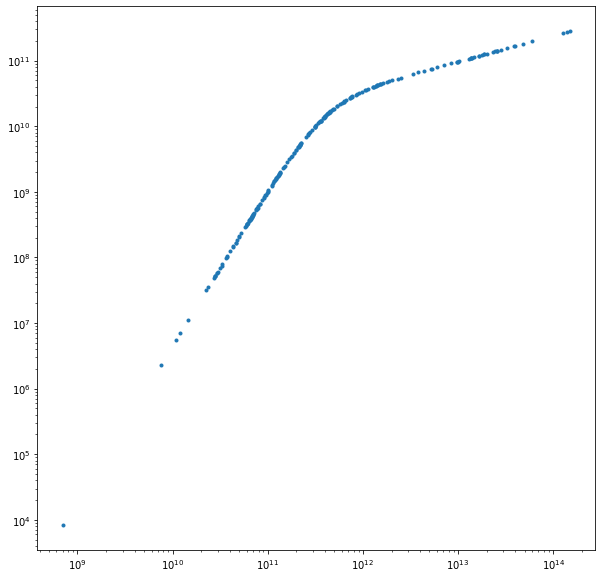

In [145]:
plt.figure(figsize=(10,10))
plt.loglog(M_h_new,m_stellar_new,'.')

In [146]:
#find central-satellite galaxies inside the same halos, True marks central galaxies, False marks satellite galaxies of the central ones above in the array
r_boo = np.full(len(r_new),True)
n_cen = 0  # number of central galaxies/galaxies which do not belong to any group (either central without satellite or satellite without their central here in this catalog)
for j in range (0, len(r_new)):
    if r_boo[j] == True:
        cen = j
        n_cen += 1
    for i in range(0,len(r_new)):   
        if i!= cen and r_boo[i] == True:
            distance_to_cen = np.sqrt((ra_new[i]-ra_new[cen])**2+(dec_new[i]-dec_new[cen])**2)
            if distance_to_cen < r_new[cen]:                                   
                if M_V_new[i] < M_V_new[cen]:  #find cen gal which has its sat. gal. brighter than it.
                    print('the satellite', id_new[i]+1, M_V_new[i], 'is brighter than its central', id_new[cen]+1, M_V_new[cen])   
                else:
                    N_GC_new[cen]+= N_GC_new[i]    # adding up the number of GCs into the total number
                    r_boo[i]      = False          #this galaxy is a sat of the cen
            else:
                r_boo[i] = True    #this galaxy is not a sat of the cen (perhaps it is another cen or a sat of the other cen)
print('number of central and single galaxies (galaxies do not belong to any group) is', n_cen)  

the satellite 340.0 -23.48 is brighter than its central 344.0 -23.47
the satellite 384.0 -23.08 is brighter than its central 389.0 -22.6
the satellite 385.0 -23.0 is brighter than its central 389.0 -22.6
the satellite 223.0 -22.36 is brighter than its central 295.0 -21.68
the satellite 234.0 -20.56 is brighter than its central 232.0 -20.4
number of central and single galaxies (galaxies do not belong to any group) is 130


In [163]:
ii = 0
cen_gal_id = np.zeros(n_cen)
ra_cen = np.zeros(n_cen)
r_cen  = np.zeros(n_cen)
dec_cen = np.zeros(n_cen)
M_V_cen = np.zeros(n_cen)
M_h_cen = np.zeros(n_cen)
N_GC_cen = np.zeros(n_cen)
for j in range (0, len(r_new)):
    if r_boo[j] == True:
        cen_gal_id[ii] = id_H[j]
        ra_cen[ii]     = ra_new[j]
        dec_cen[ii]    = dec_new[j]
        M_V_cen[ii]    = M_V_new[j]
        N_GC_cen[ii]   = N_GC_new[j]
        M_h_cen[ii]    = M_h_new[j]
        r_cen[ii]      = r_new[j]
        ii += 1

In [147]:
ra_H  = np.loadtxt(path1+'GC_cat_H13.txt', usecols=(2)) #[hour]
dec_H = np.loadtxt(path1+'GC_cat_H13.txt', usecols=(3)) #[degree]
N_GC_H  = np.loadtxt(path1+'GC_cat_H13.txt', usecols=(13)) 


In [165]:
n_count = 0
for j in range (0, len(cen_gal_id)):
    cen = j
    for i in range (0,len(ra_H)):   #check with the remain unmatched gals in Harris
        if i not in cen_gal_id: #no need to plus +1 since the id_H and i are both -1
            distance_to_cen = np.sqrt((ra_H[i]-ra_cen[cen])**2+(dec_H[i]-dec_cen[cen])**2)
            if distance_to_cen < r_cen[cen]:
                n_count += 1
                if M_V[i] < M_V_cen[cen]:     #find cen gal which has its sat. gal. brighter than it.
                    print('the satellite', i+1, M_V[i], 'is brighter than its central', cen_gal_id[cen]+1, M_V_cen[cen])   
                else: 
                    print(i+1,'is satellite of ', cen_gal_id[cen]+1)
                    N_GC_cen[cen] += N_GC_H[i]    # adding up the number of GCs into the total number
print('total (unmatched to Atlas) galaxies that belong to groups is', n_count)

394 is satellite of  2.0
382 is satellite of  6.0
393 is satellite of  16.0
the satellite 163 -23.25 is brighter than its central 21.0 -22.8
335 is satellite of  39.0
337 is satellite of  39.0
341 is satellite of  39.0
344 is satellite of  39.0
345 is satellite of  39.0
349 is satellite of  39.0
32 is satellite of  125.0
261 is satellite of  126.0
269 is satellite of  126.0
286 is satellite of  126.0
297 is satellite of  126.0
313 is satellite of  126.0
318 is satellite of  126.0
331 is satellite of  126.0
332 is satellite of  126.0
387 is satellite of  128.0
124 is satellite of  133.0
172 is satellite of  134.0
the satellite 334 -23.7 is brighter than its central 147.0 -23.16
385 is satellite of  148.0
177 is satellite of  152.0
193 is satellite of  155.0
206 is satellite of  155.0
212 is satellite of  155.0
242 is satellite of  155.0
246 is satellite of  155.0
the satellite 249 -22.82 is brighter than its central 155.0 -22.61
282 is satellite of  155.0
298 is satellite of  155.0
315 

In [167]:
n_count = 0
for j in range (0, len(r_new)):
    cen = j
    for i in range (0,len(ra_H)):   #check with the remain unmatched gals in Harris
        if i not in id_H: #no need to plus +1 since the id_H and i are both -1
            distance_to_cen = np.sqrt((ra_H[i]-ra_new[cen])**2+(dec_H[i]-dec_new[cen])**2)
            if distance_to_cen < r_new[cen]:
                n_count += 1
                if M_V[i] < M_V_new[cen]:     #find cen gal which has its sat. gal. brighter than it.
                    print('the satellite', i+1, M_V[i], 'is brighter than its central', id_new[cen]+1, M_V_new[cen])   
                else: 
                    print(i+1,'is satellite of ', id_new[cen]+1)
                    N_GC_new[cen] += N_GC_H[i]    # adding up the number of GCs into the total number
print('total (unmatched to Atlas) galaxies that belong to groups is', n_count)

the satellite 163 -23.25 is brighter than its central 164.0 -22.8
32 is satellite of  33.0
269 is satellite of  333.0
286 is satellite of  333.0
313 is satellite of  333.0
318 is satellite of  333.0
124 is satellite of  125.0
172 is satellite of  173.0
the satellite 334 -23.7 is brighter than its central 335.0 -23.16
177 is satellite of  178.0
212 is satellite of  263.0
246 is satellite of  263.0
the satellite 249 -22.82 is brighter than its central 263.0 -22.61
246 is satellite of  250.0
the satellite 249 -22.82 is brighter than its central 250.0 -20.81
254 is satellite of  250.0
269 is satellite of  324.0
38 is satellite of  39.0
286 is satellite of  322.0
313 is satellite of  322.0
318 is satellite of  322.0
246 is satellite of  194.0
the satellite 249 -22.82 is brighter than its central 194.0 -22.14
254 is satellite of  194.0
292 is satellite of  295.0
294 is satellite of  295.0
240 is satellite of  268.0
301 is satellite of  268.0
286 is satellite of  298.0
313 is satellite of  29

In [156]:
# remove the satellite galaxies out of the data
r_boo2 = r_boo
i_test = len(M_h_new)
for i in range(1,len(r_boo)):
    if r_boo[i] == False:
        M_h_new[i]  = 0
        N_GC_new[i] = 0
        i_test -= 1

In [150]:
#load theory results
M_halo_theo                 = np.loadtxt(path1+"theory_Creaseymodel.txt" ,usecols=(0))
N_GC_Mill_Creaseytheo       = np.loadtxt(path1+"theory_Creaseymodel.txt" ,usecols=(1))
err_N_GC_Mill_Creaseytheo   = np.loadtxt(path1+"theory_Creaseymodel.txt" ,usecols=(2))
N_GC_Planck_Creaseytheo     = np.loadtxt(path1+"theory_Creaseymodel.txt" ,usecols=(3))
err_N_GC_Planck_Creaseytheo = np.loadtxt(path1+"theory_Creaseymodel.txt" ,usecols=(4))
N_GC_COCO_Creaseytheo       = np.loadtxt(path1+"theory_Creaseymodel.txt" ,usecols=(5))
err_N_GC_COCO_Creaseytheo   = np.loadtxt(path1+"theory_Creaseymodel.txt" ,usecols=(6))
M_halo_theo2                = np.loadtxt(path1+"theory_ourmodel.txt"     ,usecols=(0))
N_GC_Mill_ourtheo           = np.loadtxt(path1+"theory_ourmodel.txt"     ,usecols=(1))
err_N_GC_Mill_ourtheo       = np.loadtxt(path1+"theory_ourmodel.txt"     ,usecols=(2))
N_GC_Planck_ourtheo         = np.loadtxt(path1+"theory_ourmodel.txt"     ,usecols=(3))
err_N_GC_Planck_ourtheo     = np.loadtxt(path1+"theory_ourmodel.txt"     ,usecols=(4))
N_GC_COCO_ourtheo           = np.loadtxt(path1+"theory_ourmodel.txt"     ,usecols=(5))
err_N_GC_COCO_ourtheo       = np.loadtxt(path1+"theory_ourmodel.txt"     ,usecols=(6))

In [151]:
#load data from Forbes et al.18
M_halo_F = np.loadtxt(path1+'Forbes18_data.txt',usecols=(2))
N_GC_F   = np.loadtxt(path1+'Forbes18_data.txt',usecols=(3))
M_halo_F = 10**M_halo_F

In [152]:
# load EMOSAICS Fig.1 data
mass_E   = np.loadtxt(path1+'EMOSAICS_data.txt', usecols =(0))
triangle = np.loadtxt(path1+'EMOSAICS_data.txt', usecols =(1))
square   = np.loadtxt(path1+'EMOSAICS_data.txt', usecols =(2))
star     = np.loadtxt(path1+'EMOSAICS_data.txt', usecols =(3))

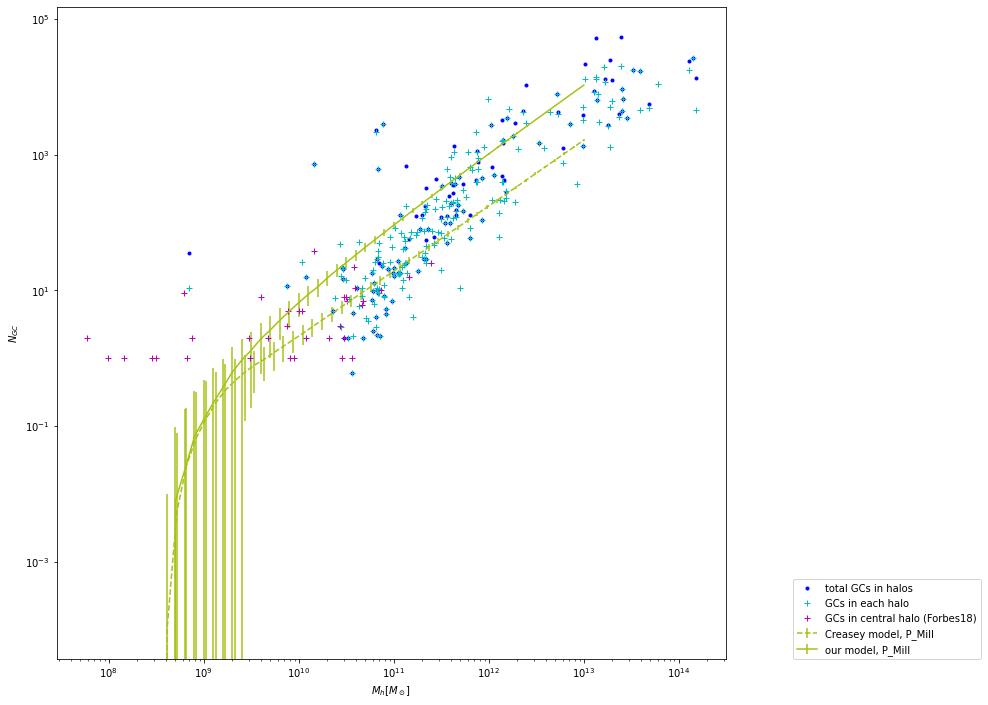

In [166]:
plt.figure(figsize=(12,12))
plt.xscale("log")
plt.yscale("log")
plt.errorbar(M_halo_theo, N_GC_Mill_Creaseytheo,  yerr=err_N_GC_Mill_Creaseytheo,  color = '#a5c215', fmt='--',label='Creasey model, P_Mill')
#plt.errorbar(M_halo_theo, N_GC_Planck_Creaseytheo,yerr=err_N_GC_Planck_Creaseytheo,color = '#186878', fmt='--',label='Creasey model, P_Planck')
#plt.errorbar(M_halo_theo, N_GC_COCO_Creaseytheo,  yerr=err_N_GC_COCO_Creaseytheo,  color = '#c23215', fmt='--',label='Creasey model, P_COCO')
plt.errorbar(M_halo_theo2,N_GC_Mill_ourtheo,      yerr=err_N_GC_Mill_ourtheo,      color = '#a5c215',label='our model, P_Mill')
#plt.errorbar(M_halo_theo2,N_GC_Planck_ourtheo,    yerr=err_N_GC_Planck_ourtheo,    color = '#186878',label='our model, P_Planck')
#plt.errorbar(M_halo_theo2,N_GC_COCO_ourtheo,      yerr=err_N_GC_COCO_ourtheo,      color = '#c23215',label='our model, P_COCO')
plt.plot(M_h_new,N_GC_new, 'b.', label = 'total GCs in halos')
plt.plot(M_h,    N_GC,     'c+', label = 'GCs in each halo')
plt.plot(M_halo_F,  N_GC_F,'m+', label = 'GCs in central halo (Forbes18)')
#plt.plot(mass_E, triangle, 'v-', label = 'EMOSAICS $M \geq 10^5 M_\odot$')
#plt.plot(mass_E, square,   's-', label = 'EMOSAICS $M \geq 10^5 M_\odot$ and $[Fe/H]$')
#plt.plot(mass_E, star, '*-',     label = 'EMOSAICS $M \geq 10^5 M_\odot$, $[Fe/H]$ and $R > R_{1/2 M_\star}$')
plt.xlabel('$M_h [M_\odot]$')
plt.ylabel('$N_{GC}$')
plt.legend(loc=(1.1,0))
plt.show()
#plt.savefig('tot_GC.png')